# Data Science and Business Analytics Internship
### Name- Mohit Patil

# Prediction using Supervised ML
We will use the simple linear regression model to complete the below task as it involves just two variables. 


## Task- 1: Predict the percentage of an student based on the no. of study hours


## Importing the libraries

In [3]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import r2_score
from scipy import stats 

%matplotlib inline

## Importing the dataset

In [4]:
# Importing the data from the given link
url = "http://bit.ly/w-data"
df= pd.read_csv(url)

## Data Exploration

### Shape of the data-

In [5]:
df.shape

(25, 2)

#### Our dataset consists of 25 rows and 2 columns.

### Reading the first 10 values-

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Summary of the dataframe-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Descriptive statistics of the dataframe-

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Pre-Processing

### Checking for any missing values-

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There are no missing values present in our dataset.

### Detecting outliers-

In [6]:
li = df[["Hours","Scores"]]
z = np.abs(stats.zscore(li))
new = list(np.where(z>3))
new

[array([], dtype=int64), array([], dtype=int64)]

#### This empty array tells us that there are no outliers present in the dataset.

### Checking the correlation between he attributes Scores and Hours-

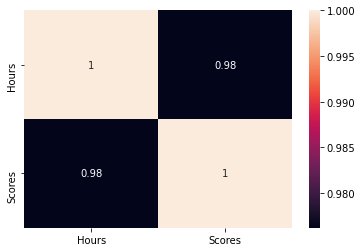

In [8]:
sns.heatmap(df.corr() , annot = True)

#### Since the correlation value is very close to 1, we get to know that both the features are positively correlated.


## Visualizing

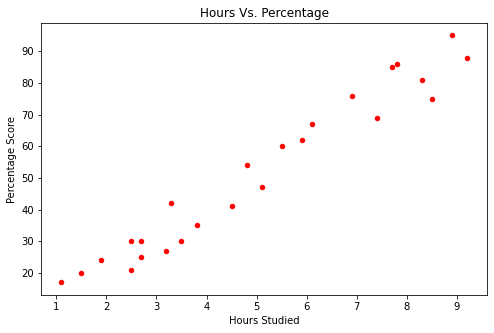

In [9]:
df.plot(kind='scatter', x='Hours', y='Scores', color='r', figsize=(8,5))
plt.title('Hours Vs. Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### From the above chart, we can say that as the no. of Hours Studied increase, the Percentage Scored increases too.

## Splitting the dataset into the Training set and Test set

#### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [10]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1]

#### Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [14]:
y_pred = regressor.predict(X_test)

#### Comparing- Actual vs Predicted value

In [15]:
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
pred_df

,Actual,Predicted
5,20,17.042892
2,27,33.516954
19,69,74.217577
16,30,26.733516
11,62,59.681640
22,35,39.331329
17,24,20.919142
24,86,78.093827
23,76,69.372265


## Visualising the Training set results

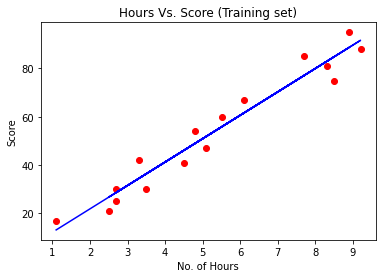

In [16]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours Vs. Score (Training set)')
plt.xlabel('No. of Hours')
plt.ylabel('Score')
plt.show()

## Visualising the Test set results

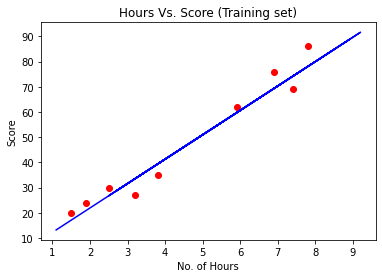

In [17]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Hours Vs. Score (Training set)')
plt.xlabel('No. of Hours')
plt.ylabel('Score')
plt.show()

#### From the above plot, we can see that the predicted values are very close to the regression line which means our predicted values are pretty accurate.

## Evaluating the model
#### By evaluating the model, we get to know how well our algorithm has performed. In this case, we have used R square method to evaluate our model.
#### The R square value ranges from 0 to 1, where 1 means, the line is best fitted to our model.

In [18]:
print(r2_score(y_pred, y_test))

0.9501380068185495


#### Since, the score is very close to 1, it means our algorithm has performed well.

## Prediction

In [19]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.14523314523316


---

---